In [1]:
import numpy as np
np.random.seed(1)

biass = []
flats = []
NXNY = (10, 30)
BIAS = 1000   # intended bias in ADU (designed by CCD manufacturer)
FLAT = 20000  # intended flat in ADU (fake value for this tutorial)
GAIN = 2.3    # electrons / ADU unit
RDNOISE = 10  # electrons unit

for i in range(19):
    bias = BIAS  # intended offset
    bias = bias + np.random.normal(loc=0, scale=RDNOISE, size=NXNY) / GAIN  
    # add read noise in ADU
    biass.append(np.around(bias).astype(int))  # round-off
    
    flat = bias.copy()  # bias level
    flat = flat + np.random.poisson(lam=20000 * GAIN, size=NXNY) / GAIN  
    # intended input flux in ADU. 
    # lambda for the poisson must be multiplied by GAIN.
    flat = flat + np.random.normal(loc=0, scale=RDNOISE, size=NXNY)
    # add read noise in ADU
    flats.append(np.around(flat).astype(int))  # round-off
    
    
bias = np.median(biass, axis=0)
flat = np.median(flats, axis=0) - bias
flat = flat / np.average(flat)
print(bias)
print(flat)

[[1000.  999. 1002.  999. 1001.  999.  999. 1000. 1001. 1000.  999. 1000.
   999. 1001. 1000. 1002. 1000. 1000.  997.  999. 1000. 1001. 1000. 1000.
  1002. 1000.  999. 1002. 1000. 1000.]
 [ 998. 1001. 1000. 1001.  999.  999.  997. 1001. 1002. 1001.  999.  999.
   998. 1001.  998. 1000. 1001. 1000. 1000. 1000. 1001. 1001. 1000.  999.
  1001. 1000. 1001. 1000. 1001.  998.]
 [ 998. 1001. 1000. 1001.  998.  999. 1001. 1000. 1001. 1000. 1000. 1000.
  1001.  999. 1000. 1000. 1000. 1000. 1000. 1002.  999. 1001.  999.  999.
  1001. 1001. 1001. 1000. 1000. 1001.]
 [ 998. 1001. 1001. 1001. 1000. 1001. 1002. 1000.  997.  999. 1000.  998.
  1000.  999. 1001. 1001. 1003.  999.  998. 1001.  999. 1001. 1000.  998.
  1000.  999.  999.  999. 1001. 1001.]
 [1000. 1000. 1001.  999. 1001. 1002.  999. 1001. 1002.  999. 1000. 1001.
   999. 1000. 1000. 1000. 1000. 1000. 1000.  999. 1001. 1001. 1000. 1000.
  1002.  999. 1002. 1003. 1000.  999.]
 [ 999. 1000. 1002. 1001. 1002. 1000.  999. 1000.  998.  998.  99

1. Show the combined bias and flat frames.

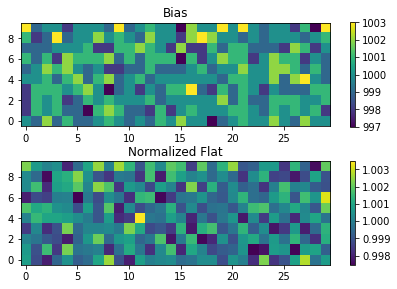

In [3]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 1)
axb, axf = axs[0], axs[1]
axb.set_title("Bias")
axf.set_title("Normalized Flat")

imb = axb.imshow(bias, origin='lower')
fig.colorbar(imb, ax=axb)
imf = axf.imshow(flat, origin='lower')
fig.colorbar(imf, ax=axf)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(1)

def fake_obj():
    ''' Makes a new fake object frame (pre-processed)
    '''    
    NX, NY = NXNY
    x = np.arange(NX)
    sky = 10 + 0.1 * x + np.random.normal(loc=0, scale=1, size=(NY, NX))
    obj = 1.5 + 0.001*(x/4 - 12)**2
    img = sky.copy()
    img[4, :] += obj
    return img

N = 9
imgs = []
for i in range(N):
    imgs.append(fake_obj())

1. Display all the 9 sample images. Can you see where our target's spectrum is? -No, spectrum image is so faint to tell spectrum from other noise.

2. Combine all those into one single file by medianing and averaging, and see if they differ.

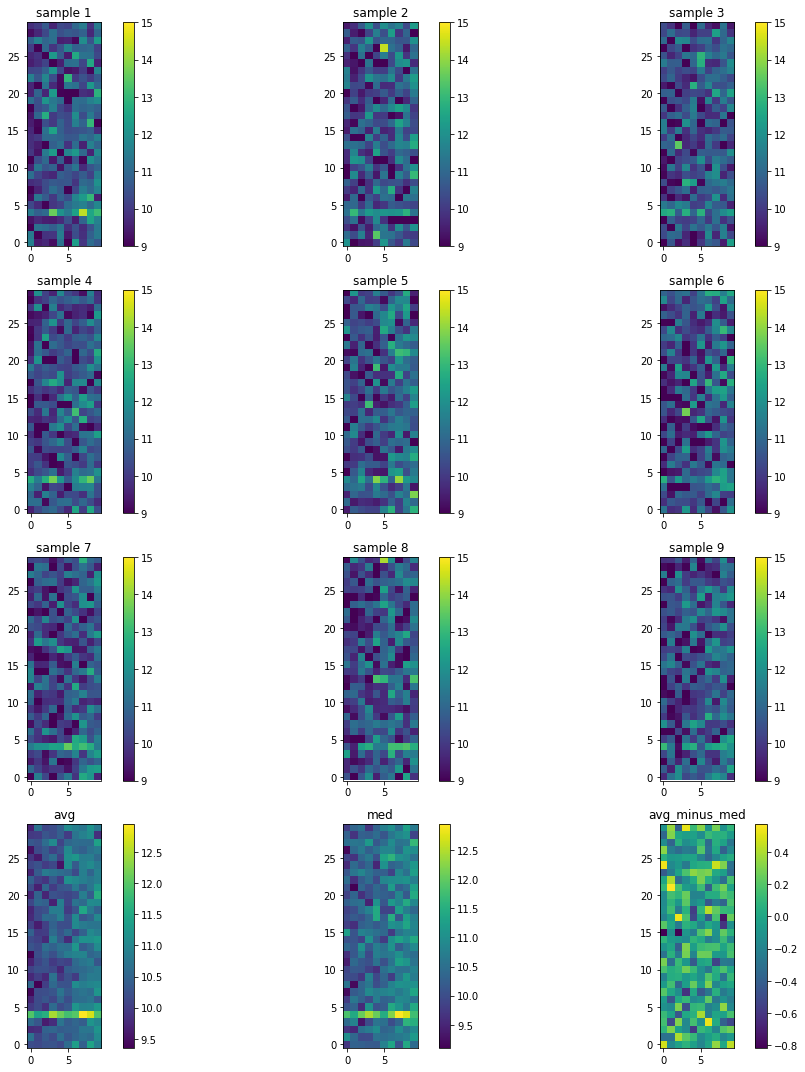

In [10]:
ncol = 3

fig, axs = plt.subplots(N//ncol + 1, ncol, figsize=(15,15))
for i, img in enumerate(imgs):
    ax = axs[i//ncol, i%ncol]
    im = ax.imshow(img, vmin=9, vmax=15, origin='lower')
    fig.colorbar(im, ax=ax)
    ax.set_title(f"sample {i+1}")

avg=np.average(imgs, axis=0)
med=np.median(imgs, axis=0)
lastrow = dict(avg=np.average(imgs, axis=0),
               med=np.median(imgs, axis=0),
               avg_minus_med=avg-med)

for i, k in enumerate(lastrow.keys()):
    ax = axs[-1, i]
    im = ax.imshow(lastrow[k], origin='lower')
    fig.colorbar(im, ax=ax)
    ax.set_title(k)

plt.tight_layout()
plt.show()